In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [61]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [62]:
df.head(5)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [63]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [64]:
df=df.fillna(df.mean()) #замена значений Nan на средние по столбцу №1 способ
#df=df.dropna() #удаление значений Nan №2 способ

In [65]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


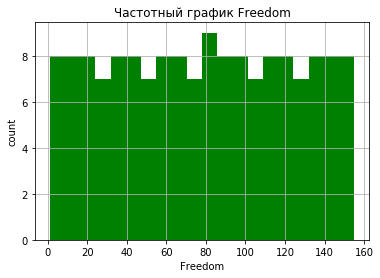

In [66]:
n = plt.hist(df['Freedom'], 20, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('count')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

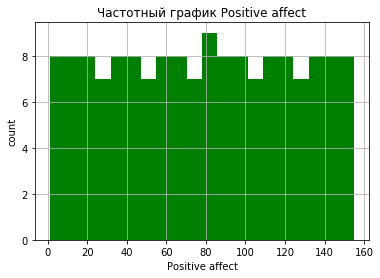

In [67]:
n = plt.hist(df['Positive affect'], 20, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('count')
plt.title('Частотный график Positive affect')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [10]:
print('Математическое ожидание: ',statistics.mean(df['Freedom']))
print('Медиана: ', statistics.median(df['Freedom']))
print('Мода: ', statistics.mode(df['Freedom']))

Математическое ожидание:  78.0
Медиана:  78.0
Мода:  78.0


Почему нельзя найти моду?

Моду нельзя найти во втором способе при удаление значений Nan, так как количество всех значений будет одинаково

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601657


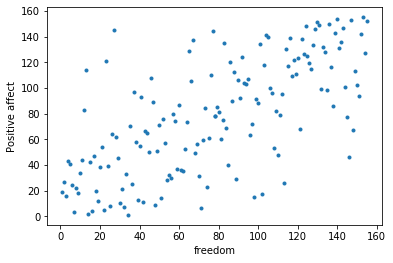

In [11]:
from scipy.stats import pearsonr
x=df['Freedom']
y=df['Positive affect']
corr, p_value = pearsonr(x, y)
plt.xlabel('freedom')
plt.ylabel('Positive affect')
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

"+"один показатель (переменная) увеличивается, то соответственно увеличивается и другой показатель (переменная)

"-" увеличению одной переменной (признака, значения) соответствует уменьшение другой переменной

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [12]:
duration = df['Freedom']
duration_1 = duration - statistics.mean(duration)
print(statistics.mean(duration_1))

0.0


In [13]:
min(duration_1)

-77.0

In [14]:
max(duration_1)

77.0

In [15]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

duration_2 = min_max_scaler.fit_transform(np.array(duration_1).reshape(-1, 1))
print(min(duration_2))
print(max(duration_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

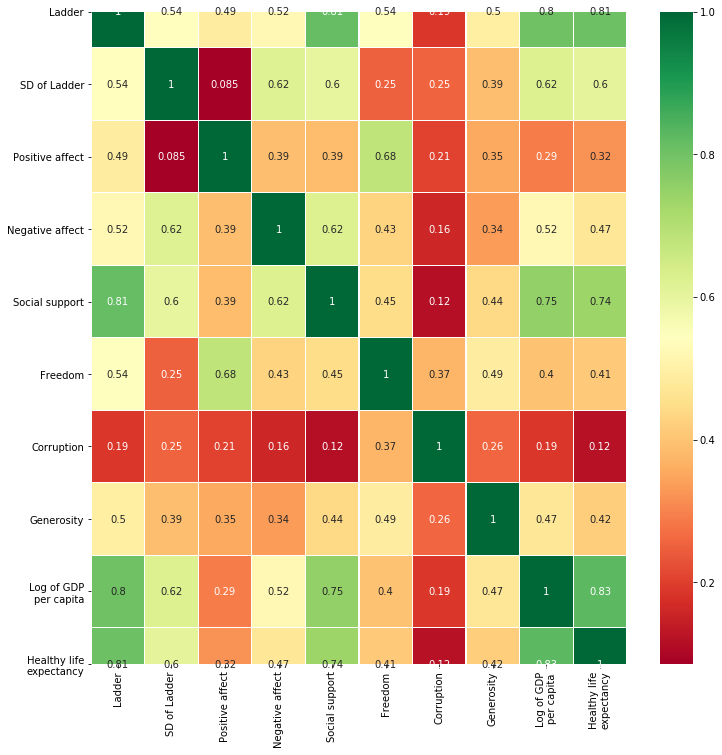

In [16]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [34]:
df=pd.read_csv('data/avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

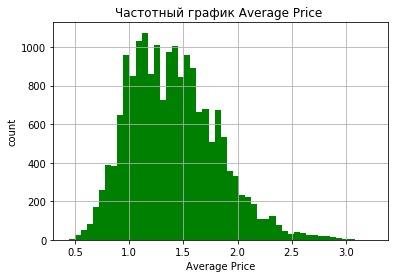

In [35]:
n, bins, patches = plt.hist(df['AveragePrice'],50,  facecolor='g')

plt.xlabel('Average Price')
plt.ylabel('count')
plt.title('Частотный график Average Price ')
plt.grid(True)
plt.show()

нормальное распределение

###### Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

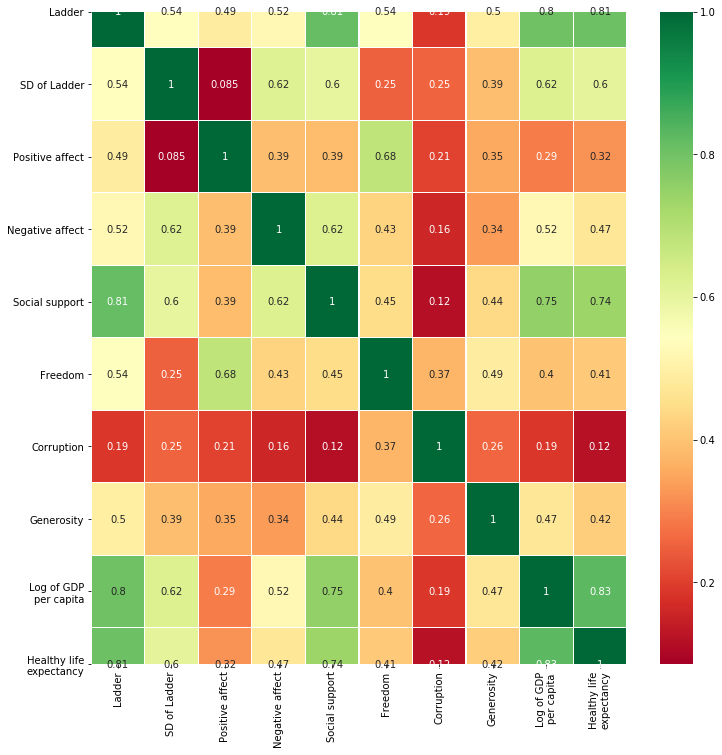

In [26]:
#Посмотрим матрицу корреляций
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [36]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', '4225', '4770', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:10])

          0         1         2         3
0  0.000046  0.002660  0.000019  0.316726
1  0.000030  0.002181  0.000023  0.323843
2  0.000035  0.005332  0.000051  0.174377
3  0.000050  0.003516  0.000029  0.227758
4  0.000041  0.002142  0.000030  0.298932
5  0.000052  0.002348  0.000017  0.291815
6  0.000060  0.003599  0.000037  0.195730
7  0.000031  0.004974  0.000031  0.192171
8  0.000045  0.004265  0.000034  0.206406
9  0.000037  0.003163  0.000044  0.224199


Коэффициент корреляции Пирсона для авакадо 4046 и 4225: 0.9261099558992295


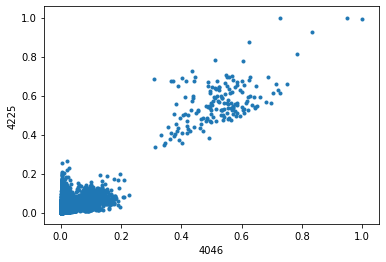

In [38]:
from scipy.stats import pearsonr
x=df_norm[0]
y=df_norm[1]
corr, p_value = pearsonr(x, y)
plt.xlabel('4046')
plt.ylabel('4225')
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона для авакадо 4046 и 4225:', corr)

Коэффициент корреляции Пирсона для авакадо 4046 и 4770: 0.9261099558992295


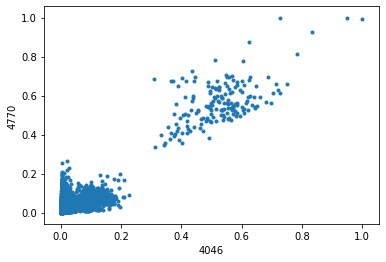

In [40]:
x=df_norm[0]
y=df_norm[1]
corr, p_value = pearsonr(x, y)
plt.xlabel('4046')
plt.ylabel('4770')
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона для авакадо 4046 и 4770:', corr)

Коэффициент корреляции Пирсона для авакадо 4046 и средней ценой: -0.2083170484878848


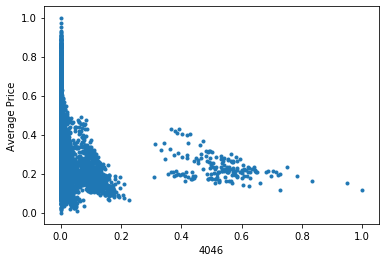

In [41]:
x=df_norm[0]
y=df_norm[3]
corr, p_value = pearsonr(x, y)
plt.xlabel('4046')
plt.ylabel('Average Price')
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона для авакадо 4046 и средней ценой:', corr)


Коэффициент корреляции Пирсона для авакадо 4225 и 4770: 0.8878549976059532


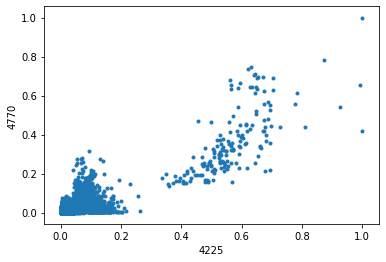

In [43]:
x=df_norm[1]
y=df_norm[2]
corr, p_value = pearsonr(x, y)
plt.xlabel('4225')
plt.ylabel('4770')
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона для авакадо 4225 и 4770:', corr)

Коэффициент корреляции Пирсона для авакадо 4225 и средней цены: -0.1729277725093354


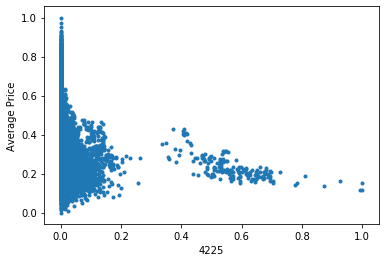

In [44]:
x=df_norm[1]
y=df_norm[3]
corr, p_value = pearsonr(x, y)
plt.xlabel('4225')
plt.ylabel('Average Price')
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона для авакадо 4225 и средней цены:', corr)

Коэффициент корреляции Пирсона для авакадо 4770 и средней цены: -0.17944598397975625


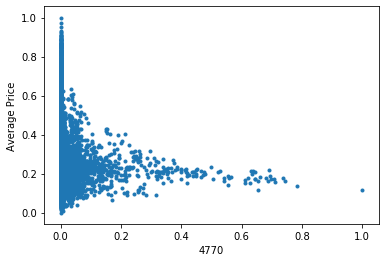

In [45]:
x=df_norm[2]
y=df_norm[3]
corr, p_value = pearsonr(x, y)
plt.xlabel('4770')
plt.ylabel('Average Price')
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона для авакадо 4770 и средней цены:', corr)

Между "4046 и 4225", "4046 и 4770" - очень высокая корреляция
Между "4225 и 4770" - средняя корреляция
Между "4046 и средней ценой", "4225 и средней цены", "4770 и средней цены" -  слабая отрицательная корреляция, т.е. при каждом изменении происходит эквивалентное минимальное изменение второй переменной в противоположном направлении.